In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 14s 0us/step


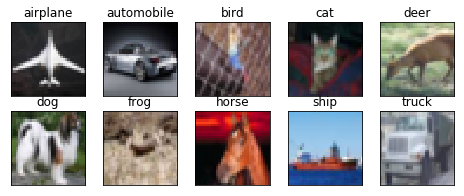

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
print(num_train, img_channels, img_rows, img_cols)
print(num_classes)

50000 32 32 3
10


## Without Cutout

* 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)       

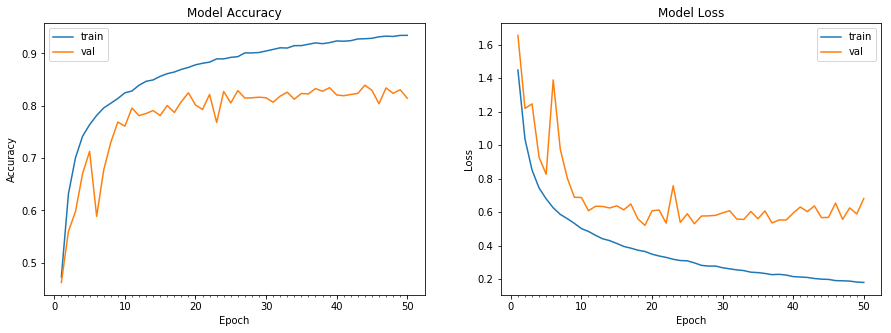

Accuracy on test data is: 81.44


In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Size 32 RF 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(48, 3, 3, input_shape=(32, 32, 3)))  #Size 30 RF 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(48, 3, 3)) #Size 28 RF 7*7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3,border_mode='same')) #Size 28 RF 9*9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3)) #Size 26 RF 11*11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3)) #Size 24 RF 13*13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))



model.add(MaxPooling2D(pool_size=(2, 2))) #Size 12 RF 26*26
model.add(Convolution2D(48, 1, activation='relu')) #Size 12 RF 26*26


model.add(Convolution2D(48, 3, 3)) #Size 10 RF 28*28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(96, 3, 3)) #Size 8 RF 30*30
#model.add(BatchNormalization())
model.add(Activation('relu'))

#model.add(Dropout(0.1))

'''
model.add(Convolution2D(192, 3, 3)) #Size 6 RF 32*32
model.add(Activation('relu'))
'''

model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))



# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
def l2_custom_loss(y_true, y_pred):
  
  
  
  
  #bin_entropy_loss = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
  bin_entropy_loss = K.mean(K.categorical_crossentropy(y_true, y_pred), axis=-1)
  
  # Get list of weights
  
  w = []
  for layer in model.layers:
    for weight in layer.get_weights():
      w.append(weight.flatten())
  
  w_list = np.concatenate(w).ravel().tolist()
  w_array = np.asarray(w_list)
  
  l2_reg_loss = lamda/(2*train_features.shape[0]) * K.sum(K.square(K.abs(w_array)))
  
  loss = bin_entropy_loss
  
  
  return loss

lamda = 0.1
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


## Class Activation

* Using the last convolution layer for determining the activation


In [0]:
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import keras.backend as K
import numpy as np
import cv2
import sys

import random
random_imgs = random.sample(range(1, 1000), 5)
random_imgs = [884, 249, 293, 371, 423]

orig_imgs = []
mod_imgs = []
heat_imgs = []

for img_idx in random_imgs:
  x = np.expand_dims(test_features[img_idx], axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_10")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
    #plt.matshow(heatmap)
  img = test_features[img_idx]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  superimposed_img = heatmap*0.4+img*0.6
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  #cv2_imshow(img)
  #cv2_imshow(superimposed_img)
  orig_imgs.append(img)
  mod_imgs.append(superimposed_img)
  heat_imgs.append(heatmap)
  cv2.waitKey(0)






Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


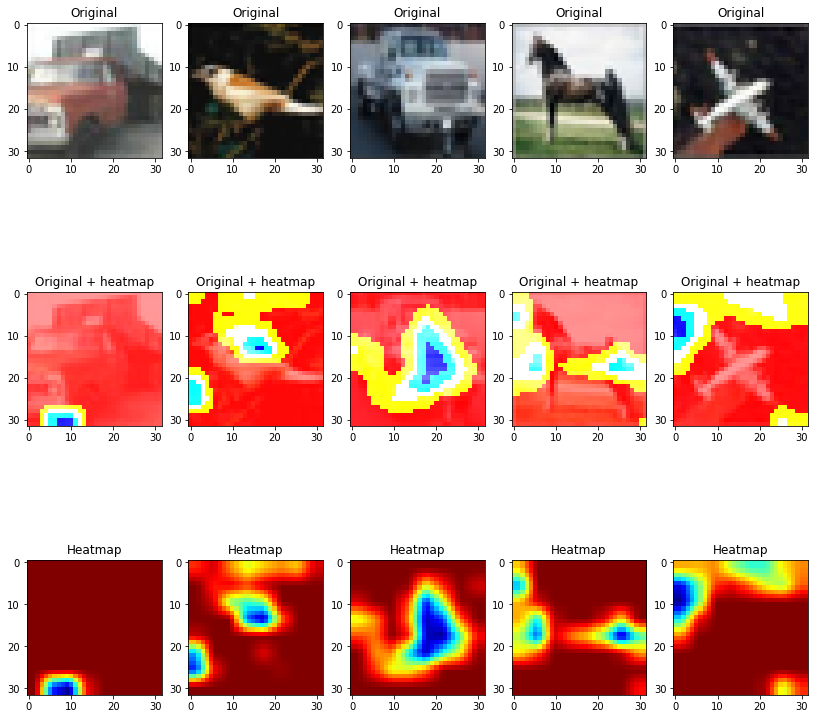

In [11]:
img_list = orig_imgs + mod_imgs + heat_imgs

# settings
h, w = 5, 5       # for raster image
nrows, ncols = 3, 5  # array of sub-plots
figsize = [14,14]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    if i < 5:
      
      axi.set_title("Original")
    elif i <10 :
      axi.set_title("Original + heatmap")
    else:
      axi.set_title("Heatmap")
    
    axi.imshow(img_list[i])

## Observations

* Activation for 

* > 1st picture : car is wheel

* > 2nd picture : bird is body and surroundings

* > 3nd picture : car is front body

* > 4th picture : horse is tail and top part of leg

* > 5th picture : plane is the shape


In [0]:
random_imgs

## Run 2 - with cutout

* Rerunning the model with cutout

* Enabled it as a part of the Datagen generator

In [0]:
##Random cutoff

random_erasing = True
pixel_level = False

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 48)       

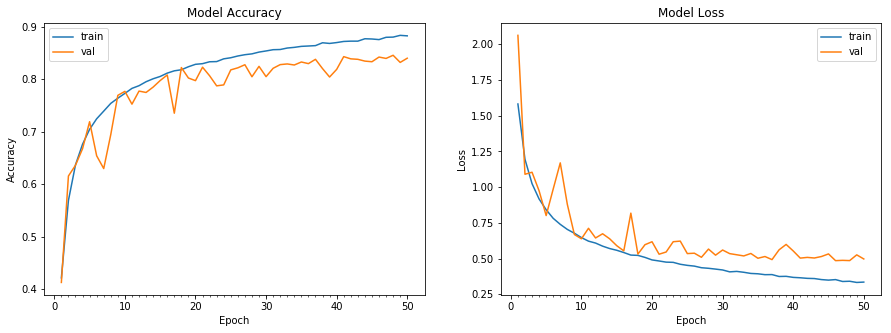

Accuracy on test data is: 83.98


In [13]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Size 32 RF 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(48, 3, 3, input_shape=(32, 32, 3)))  #Size 30 RF 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(48, 3, 3)) #Size 28 RF 7*7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

#model.add(MaxPooling2D(pool_size=(2, 2))) #Size 14 RF 14
model.add(Convolution2D(96, 3, 3,border_mode='same')) #Size 28 RF 9*9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3)) #Size 26 RF 11*11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3)) #Size 24 RF 13*13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))



model.add(MaxPooling2D(pool_size=(2, 2))) #Size 12 RF 26*26
model.add(Convolution2D(48, 1, activation='relu')) #Size 12 RF 26*26


model.add(Convolution2D(48, 3, 3)) #Size 10 RF 28*28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(96, 3, 3)) #Size 8 RF 30*30
#model.add(BatchNormalization())
model.add(Activation('relu'))

#model.add(Dropout(0.1))

'''
model.add(Convolution2D(192, 3, 3)) #Size 6 RF 32*32
model.add(Activation('relu'))
'''

model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))



# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
def l2_custom_loss(y_true, y_pred):
  
  
  
  
  #bin_entropy_loss = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
  bin_entropy_loss = K.mean(K.categorical_crossentropy(y_true, y_pred), axis=-1)
  
  # Get list of weights
  
  w = []
  for layer in model.layers:
    for weight in layer.get_weights():
      w.append(weight.flatten())
  
  w_list = np.concatenate(w).ravel().tolist()
  w_array = np.asarray(w_list)
  
  l2_reg_loss = lamda/(2*train_features.shape[0]) * K.sum(K.square(K.abs(w_array)))
  
  loss = bin_entropy_loss
  
  
  return loss

lamda = 0.1
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=pixel_level))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


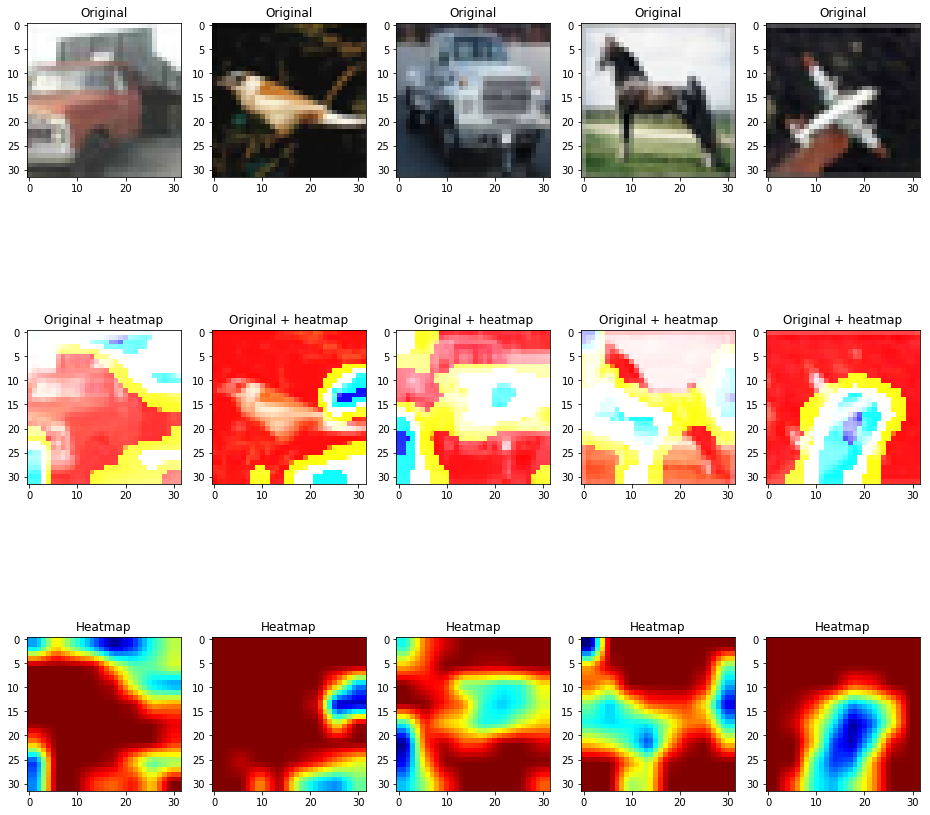

In [14]:
random_imgs = [884, 249, 293, 371, 423]

orig_imgs = []
mod_imgs = []
heat_imgs = []

for img_idx in random_imgs:
  x = np.expand_dims(test_features[img_idx], axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_20")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
    #plt.matshow(heatmap)
  img = test_features[img_idx]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  superimposed_img = heatmap*0.1+img
  #superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.2, 0)
  #cv2_imshow(img)
  #cv2_imshow(superimposed_img)
  orig_imgs.append(img)
  mod_imgs.append(superimposed_img)
  heat_imgs.append(heatmap)
  cv2.waitKey(0)

img_list = orig_imgs + mod_imgs + heat_imgs

# settings
h, w = 5, 5       # for raster image
nrows, ncols = 3, 5  # array of sub-plots
figsize = [16,16]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
  if i < 5:
      
    axi.set_title("Original")
  elif i <10 :
    axi.set_title("Original + heatmap")
  else:
    axi.set_title("Heatmap")

  axi.imshow(img_list[i])

# Observations and Learning (After Cutout)

The gap between training accuracy and validation accuray is small. This would imply cutout significantly helped in generalizing and reduce overfitting.

We can clearly see that the activations become more generic after cutout. This means the network is able to do a better job predicting using general features 

Activation for cutout

* > 1st picture : truck - the fron portion

* > 2nd picture : bird changed to surroundings and tail

* > 3nd picture : car was wheels ( earlier was front body)

* > 4th picture : horse is top part of leg and surrounding

* > 5th picture : plane more specific fin and wing